In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np

In [3]:

df = pd.read_csv('cars.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
City mpg                   5076 non-null int64
Classification             5076 non-null object
Driveline                  5076 non-null object
Engine Type                5076 non-null object
Fuel Type                  5076 non-null object
Height                     5076 non-null int64
Highway mpg                5076 non-null int64
Horsepower                 5076 non-null int64
Hybrid                     5076 non-null bool
ID                         5076 non-null object
Length                     5076 non-null int64
Make                       5076 non-null object
Model Year                 5076 non-null object
Number of Forward Gears    5076 non-null int64
Torque                     5076 non-null int64
Transmission               5076 non-null object
Width                      5076 non-null int64
Year                       5076 non-null int64
dtypes: bool(1), int64(9), object(8)
mem

In [8]:
df.head()

,City mpg,Classification,Driveline,Engine Type,Fuel Type,Height,Highway mpg,Horsepower,Hybrid,ID,Length,Make,Model Year,Number of Forward Gears,Torque,Transmission,Width,Year
0,18,Automatic transmission,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,Gasoline,140,25,250,False,2009 Audi A3 3.2,143,Audi,2009 Audi A3,6,236,6 Speed Automatic Select Shift,202,2009
1,22,Automatic transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T AT,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
2,21,Manual transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,30,200,False,2009 Audi A3 2.0 T,143,Audi,2009 Audi A3,6,207,6 Speed Manual,202,2009
3,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
4,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009


In [18]:

arr_classific = [['City mpg','Quantitativa Discreta'],
                 ['Highway mpg','Quantitativa Discreta'],
                 ['Horsepower','Quantitativa Discreta'],
                 ['Torque','Quantitativa Discreta'],
                 ['Fuel Type','Qualitativa Nominal'],
                 ['Transmission','Qualitativa Ordinal'],
                 ['Year','Quantitativa Discreta']
              
                ]
dtclassific = pd.DataFrame(data=arr_classific, columns=['Variable','Classification'])
print(dtclassific)

       Variable         Classification
0      City mpg  Quantitativa Discreta
1   Highway mpg  Quantitativa Discreta
2    Horsepower  Quantitativa Discreta
3        Torque  Quantitativa Discreta
4     Fuel Type    Qualitativa Nominal
5  Transmission    Qualitativa Ordinal
6          Year  Quantitativa Discreta


W: 0.9775 p-value: 0.0000
REJEITA H0, NAO HA NORMALIDADE NOS DADOS, SEGUE PARA Kruskal-Wallis


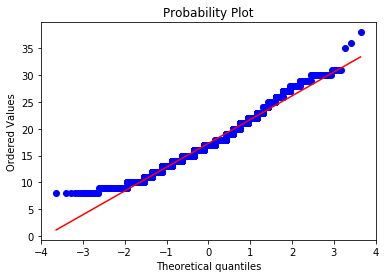

In [13]:
y = df['City mpg']
#y = df['Highway mpg']

#

stats.probplot(y, plot=plt, dist="norm")

w,p = stats.shapiro(y)

print("W: %.4f p-value: %.4f" % (w,p))

if p > 0.05:
    print("ACEITE H0, DADOS SAO NORMAIS. SEGUE PARA ANOVA")
else:
    print("REJEITA H0, NAO HA NORMALIDADE NOS DADOS, SEGUE PARA Kruskal-Wallis")

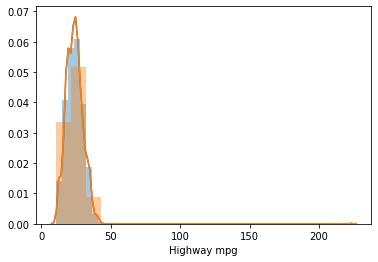

In [33]:
#sns.distplot( df['City mpg'])
#sns.distplot( df['City mpg'], bins=30 )
#sns.plt.show()
sns.distplot( df['Highway mpg'])
sns.distplot( df['Highway mpg'], bins=20 )

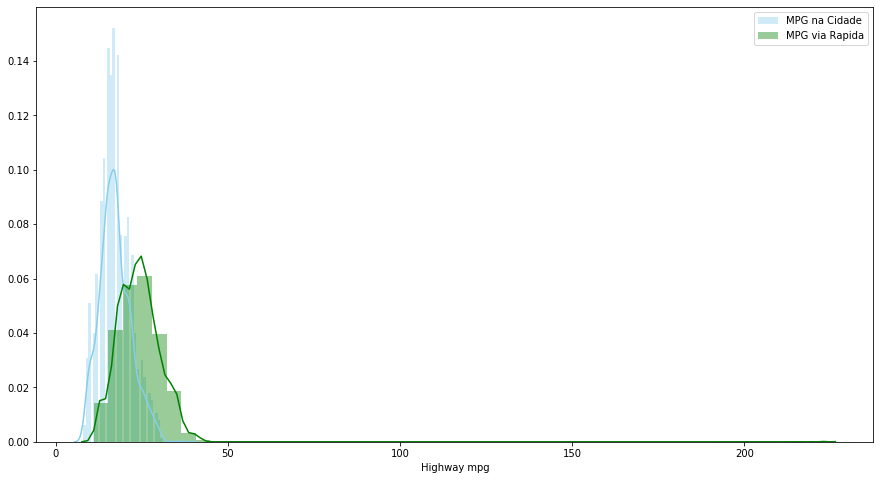

In [17]:

f, axes = plt.subplots(figsize=(15,8))
sns.distplot( df["City mpg"] , color="skyblue",label="MPG na Cidade", ax=axes)
sns.distplot( df["Highway mpg"] , color="green",label="MPG via Rapida", ax=axes)
plt.legend()


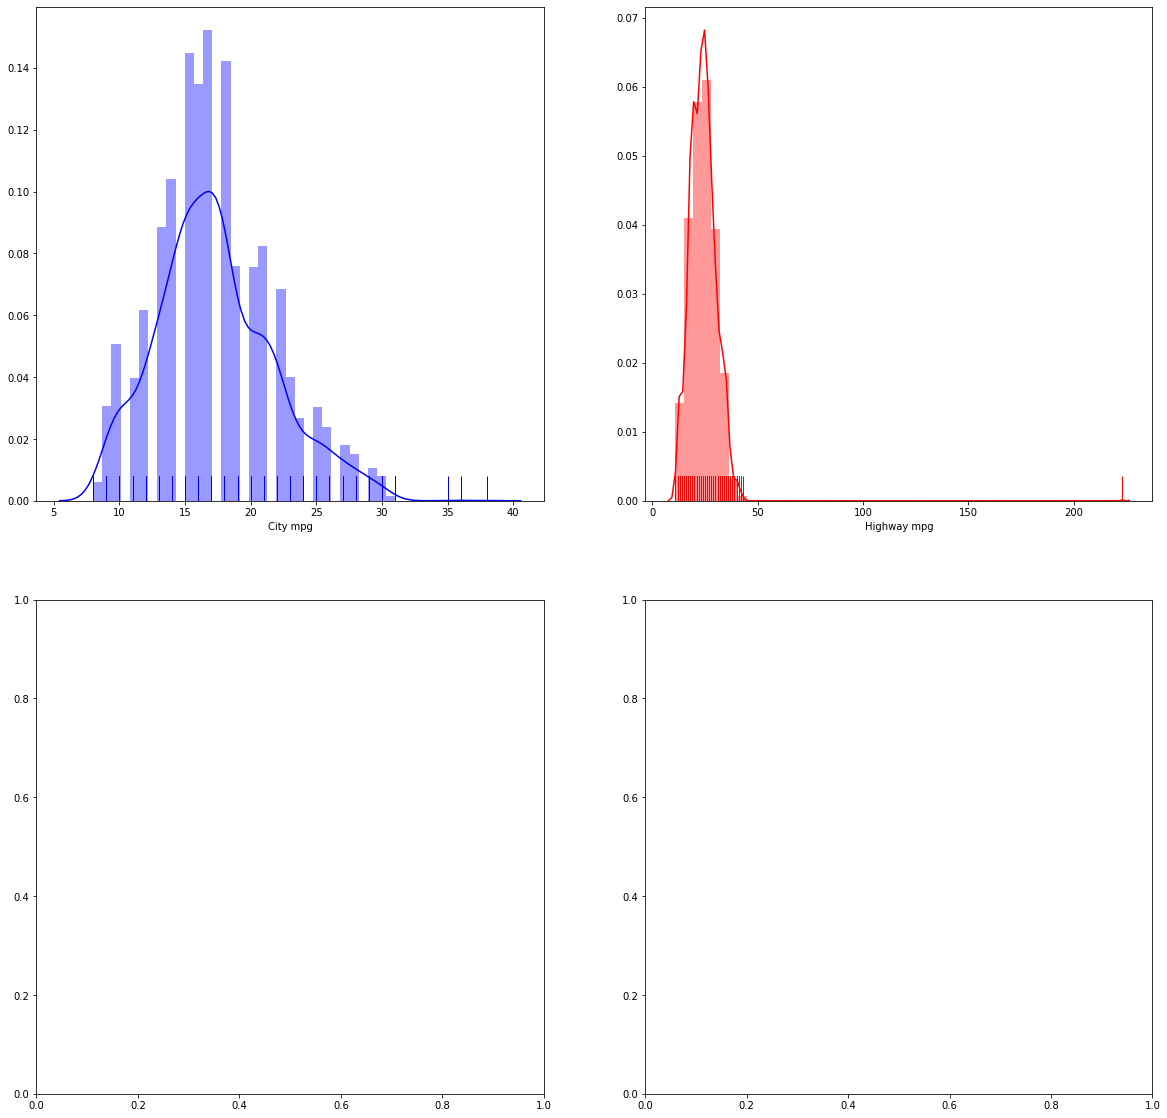

In [96]:

f, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.distplot( df["City mpg"] , color="blue", rug=True,  ax=axes[0,0])
sns.distplot( df["Highway mpg"] , color="red", rug=True, ax=axes[0,1])



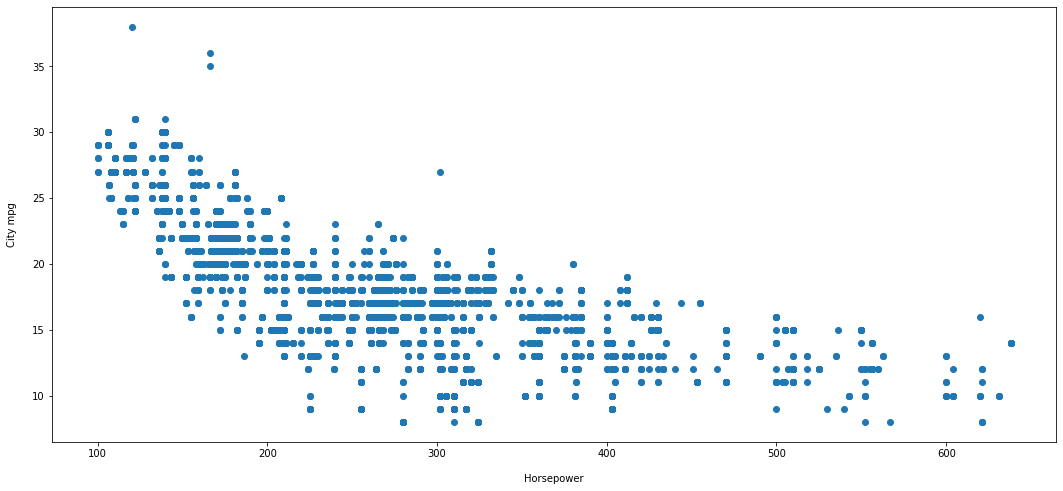

In [19]:
x = df['Horsepower']
y = df['City mpg']
fig, ax = plt.subplots(figsize=(18, 8))
plt.scatter(x, y, label = 'Pontos',  marker = 'o')
ax.set_xlabel('Horsepower', labelpad=15)
ax.set_ylabel('City mpg', labelpad=15)
#ax.set_title('Relação do peso de decolagem com o número de fatalidades da ocorrência', pad=15)
  
plt.show()

In [94]:
df[df['City mpg']>34]

,City mpg,Classification,Driveline,Engine Type,Fuel Type,Height,Highway mpg,Horsepower,Hybrid,ID,Length,Make,Model Year,Number of Forward Gears,Torque,Transmission,Width,Year
134,38,Manual transmission,Front-wheel drive,Ford 1.6L 4 Cylinder 120 hp 112 ft-lbs,Gasoline,193,37,120,False,2011 Ford Fiesta Sedan S,57,Ford,2011 Ford Fiesta Sedan,5,112,5 Speed Manual,160,2011
645,36,Automatic transmission,Front-wheel drive,Kia 2.4L 4 Cylinder 166 hp 154 ft-lbs Hybrid,Gasoline,170,40,166,True,2011 Kia Optima Hybrid,235,Kia,2011 Kia Optima Hybrid,6,154,6 Speed Automatic Select Shift,39,2011
1050,35,Automatic transmission,Front-wheel drive,Hyundai 2.4L 4 Cylinder 166 hp 154 ft-lbs Hybrid,Gasoline,185,40,166,True,2011 Hyundai Sonata Hybrid,212,Hyundai,2011 Hyundai Sonata Hybrid,6,154,6 Speed Automatic Select Shift,41,2011


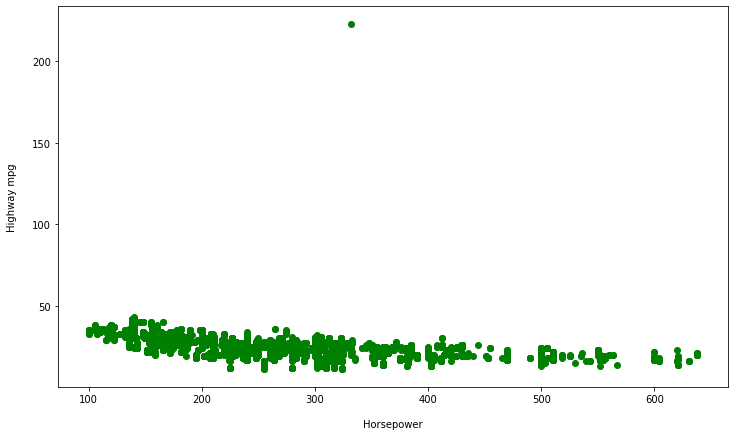

In [24]:
x = df['Horsepower']
y = df['Highway mpg']
colors = "g"
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(x, y, label = 'Pontos',  marker = 'o', color=colors)
ax.set_xlabel('Horsepower', labelpad=15)
ax.set_ylabel('Highway mpg', labelpad=15)
#ax.set_title('Relação do peso de decolagem com o número de fatalidades da ocorrência', pad=15)
  
plt.show()

In [106]:
#df[df['Hybrid']==True]
df[df['Highway mpg']>100]

,City mpg,Classification,Driveline,Engine Type,Fuel Type,Height,Highway mpg,Horsepower,Hybrid,ID,Length,Make,Model Year,Number of Forward Gears,Torque,Transmission,Width,Year
3686,20,Automatic transmission,Rear-wheel drive,Chevrolet 6.0L 8 Cylinder 332 hp 367 ft-lbs Hy...,Gasoline,82,223,332,True,2011 Chevrolet Silverado 1500 Hybrid 1HY,207,Chevrolet,2011 Chevrolet Silverado 1500 Hybrid,4,367,4 Speed Automatic,240,2011


In [120]:
df['Transmission'].value_counts()

6 Speed Automatic Select Shift    1313
6 Speed Automatic                  767
6 Speed Manual                     734
4 Speed Automatic                  671
5 Speed Automatic                  654
5 Speed Manual                     393
5 Speed Automatic Select Shift     216
7 Speed Automatic Select Shift     111
8 Speed Automatic Select Shift      91
4 Speed Automatic Select Shift      85
7 Speed Automatic                   41
Name: Transmission, dtype: int64

In [30]:
df[df['Horsepower']>500]

,City mpg,Classification,Driveline,Engine Type,Fuel Type,Height,Highway mpg,Horsepower,Hybrid,ID,Length,Make,Model Year,Number of Forward Gears,Torque,Transmission,Width,Year
14,12,Automatic transmission,All-wheel drive,BMW 4.4L 8 cylinder 555hp 500 ft-lbs Turbo,Gasoline,226,17,555,False,2010 BMW X5 M SUV,243,BMW,2010 BMW X5,6,500,6 Speed Automatic Select Shift,201,2010
15,12,Automatic transmission,All-wheel drive,BMW 4.4L 8 cylinder 555hp 500 ft-lbs Turbo,Gasoline,226,17,555,False,2011 BMW X5 M SUV,243,BMW,2011 BMW X5,6,500,6 Speed Automatic Select Shift,201,2011
16,12,Automatic transmission,All-wheel drive,BMW 4.4L 8 cylinder 555hp 500 ft-lbs Turbo,Gasoline,148,17,555,False,2010 BMW X6 M,12,BMW,2010 BMW X6,6,500,6 Speed Automatic Select Shift,191,2010
17,12,Automatic transmission,All-wheel drive,BMW 4.4L 8 cylinder 555hp 500 ft-lbs Turbo,Gasoline,148,17,555,False,2011 BMW X6 M,12,BMW,2011 BMW X6,6,500,6 Speed Automatic Select Shift,191,2011
48,9,Automatic transmission,Rear-wheel drive,Bentley 6.8L 8 cylinder 530hp 774 ft-lbs Turbo,Gasoline,193,15,530,False,2010 Bentley Brooklands,34,Bentley,2010 Bentley Brooklands,6,774,6 Speed Automatic,107,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,13,Manual transmission,Rear-wheel drive,Aston Martin 6.0L 510 hp 420 ft-lbs,Gasoline,217,19,510,False,2012 Aston Martin V12 Vantage,33,Aston Martin,2012 Aston Martin V12 Vantage,6,420,6 Speed Manual,73,2012
5012,13,Manual transmission,Rear-wheel drive,Aston Martin 6.0L 510 hp 420 ft-lbs,Gasoline,217,19,510,False,2012 Aston Martin V12 Vantage Carbon Black,33,Aston Martin,2012 Aston Martin V12 Vantage,6,420,6 Speed Manual,73,2012
5051,11,Automatic transmission,Rear-wheel drive,Bentley 6.8L 8 Cylinder 505 hp 752 ft-lbs Turbo,Gasoline,241,18,505,False,2012 Bentley Mulsanne,199,Bentley,2012 Bentley Mulsanne,8,752,8 Speed Automatic Select Shift,134,2012
5072,12,Manual transmission,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,Gasoline,141,20,552,False,2012 Lamborghini Gallardo Coupe LP 560-4,249,Lamborghini,2012 Lamborghini Gallardo Coup,6,398,6 Speed Manual,108,2012


In [16]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

city = go.Bar(x = df["Fuel Type"].unique(),
                    y = np.sort(df.groupby(["Fuel Type"]).mean()["City mpg"]),
                    name = "Mpg na cidade",
                    marker = {'color': '#b71540'},
                    opacity = .5)

highway = go.Bar(x = df["Fuel Type"].unique(),
                     y = np.sort(df.groupby("Fuel Type").mean()["Highway mpg"]),
                     name = "Mpg na estrada",
                     marker = {'color': '#e55039'},
                     opacity = .8)

data = [city, highway]

# Criando Layout
layout = go.Layout(title='',
                   yaxis={'title':'(miles-per-gallon)'},
                   xaxis={'title': 'Combustível'})

# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)

# Exibindo figura/gráfico
py.iplot(fig)
#fig.show(renderer="colab")

In [15]:


city = go.Bar(x = df["Make"].unique(),
                    y = np.sort(df.groupby(["Make"]).mean()["City mpg"]),
                    name = "Mpg na cidade",
                    marker = {'color': '#54a0ff'},
                    opacity = .5)

highway = go.Bar(x = df["Make"].unique(),
                     y = np.sort(df.groupby("Make").mean()["Highway mpg"]),
                     name = "Mpg na estrada",
                     marker = {'color': '#5f27cd'},
                     opacity = .8)

data = [city, highway]

# Criando Layout
layout = go.Layout(title='',
                   yaxis={'title':'MPG (miles-per-gallon)'},
                   xaxis={'title': 'Marca'})

# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)

# Exibindo figura/gráfico
py.iplot(fig)
#fig.show(renderer="colab")

In [ ]:
city = go.Bar(x = np.sort(df["Make"].unique()),
                    y = df.groupby(["Make"]).mean()["City mpg"],
                    name = "Mpg na cidade",
                    marker = {'color': '#54a0ff'},
                    opacity = .5)

highway = go.Bar(x = np.sort(df["Make"].unique()),
                     y = df.groupby("Make").mean()["Highway mpg"],
                     name = "Mpg na estrada",
                     marker = {'color': '#5f27cd'},
                     opacity = .8)

data = [city, highway]

# Criando Layout
layout = go.Layout(title='Média de mpg por Marca',
                   yaxis={'title':'MPG (miles-per-gallon)'},
                   xaxis={'title': 'Tipo de motor'})

# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)

# Exibindo figura/gráfico
py.iplot(fig)
#fig.show(renderer="colab")

In [6]:
transmissoes = df["Transmission"].unique()
cores = ['#55efc4', '#00cec9', '#ff7675', '#e84393', "#81ecec", "#0984e3", "#fd79a8", "#2d3436", "#ffeaa7", "#e17055", "#fdcb6e", "#a29bfe", "#b2bec3"]
data = []

for i, t in enumerate(transmissoes):
    # Gerando gráficos para Gasolina
    trace = go.Box(y = df.loc[df['Transmission'] == t, 'Horsepower'],
                   name = t,
                   marker = {'color': cores[i]})
    data.append(trace)

layout = go.Layout(title = 'Dispersão de Potência para diferentes Tipos de transmissão',
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   xaxis = {'title': 'Tipo de Transmissão'},
                   yaxis = {'title': 'Potência em Cavalos'},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')

fig = go.Figure(data=data, layout=layout)
#fig.show(renderer="colab")
py.iplot(fig)

In [7]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

city = go.Bar(x = np.sort(df["Year"].unique()),
                    y = df.groupby(["Year"]).mean()["City mpg"],
                    name = "Mpg na cidade",
                    marker = {'color': '#00cc00'},
                    opacity = .5)

highway = go.Bar(x = np.sort(df["Year"].unique()),
                     y = df.groupby("Year").mean()["Highway mpg"],
                     name = "Mpg na estrada",
                     marker = {'color': '#AA0000'},
                     opacity = .8)

data = [city, highway]

# Criando Layout
layout = go.Layout(title='',
                   yaxis={'title':'(miles-per-gallon)'},
                   xaxis={'title': 'Ano'})

# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)

# Exibindo figura/gráfico
py.iplot(fig)
#fig.show(renderer="colab")